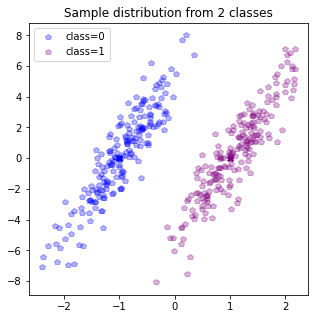

In [2]:
import numpy as np 
np.random.seed(0)
import matplotlib.pyplot as plt
N_Classes  = 2 
N_FEATURES = 2 
_N = 200
N_SAMPLE  = _N * N_Classes

cov = np.array([[0.3, 1.5], [1.5, 9.0]])

mean1 = np.array([-1,0])
mean2 = np.array([1,0])
npMEANS  = np.array([mean1,mean2])

colors   = np.array(["blue","purple"])
X2 = []

plt.figure(figsize=(5,5))
for icluster in range(N_Classes):
    color     = colors[icluster]
    npmean    = npMEANS[icluster]
    s_cluster = np.random.multivariate_normal(npmean,cov,_N)
    
    X2.extend(s_cluster) #adds the specified list elements (or any iterable) to the end of the current list.
    
    plt.plot(npmean[0],npmean[1],"X",color=color)
    plt.plot(s_cluster[:,0],s_cluster[:,1],"p",alpha=0.3,color=color,label="class={}".format(icluster))
plt.title("Sample distribution from {} classes".format(N_Classes))
plt.legend()
plt.show()

In [6]:
X2 = np.array(X2)
print("X2:      Data Dimension = (N_SAMPLE,N_FEATURES)  = {}".format(X2.shape))


X2:      Data Dimension = (N_SAMPLE,N_FEATURES)  = (400, 2)


In [7]:
from sklearn.decomposition import PCA
pca = PCA(N_FEATURES)
pca.fit(X2)
print(pca.components_,"\n")
print(pca.explained_variance_)

[[-0.19196911 -0.98140097]
 [ 0.98140097 -0.19196911]] 

[9.11349606 1.0498524 ]


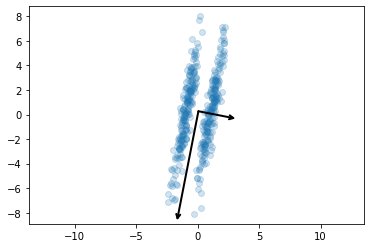

In [8]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [11]:
pca = PCA(n_components=1)
pca.fit(X2)
X_pca = pca.transform(X2)
print("original shape:   ", X2.shape)
print("transformed shape:", X_pca.shape)

original shape:    (400, 2)
transformed shape: (400, 1)


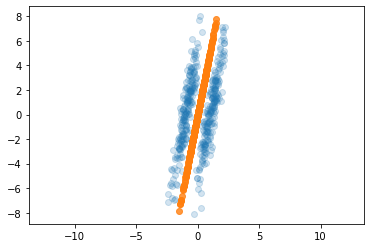

In [12]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');